# LAB: KNN 

## 1. Introducción

El objetivo de este LAB es clasificar si un determinado tipo de vino es de alta o baja calidad. Para eso usaremos un dataset que contiene un set amplio de features vinculados a diversas características del vino, tales como acidez, azúclar, densidad, ph, si es tinto, etc.

Usaremos como target high_quality, una discretización de la variable quality.

Para llevar a cabo esta tarea ,como input vamos a usar las features de cada vino.

In [21]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
%matplotlib inline


# Cargar el dataset (si el link está caído... buscar el dataset en el campus)

df = pd.read_csv("../Data/wine.csv")
df.sample(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,is_red,high_quality
2916,7.0,0.150,0.34,1.4,0.039,21.0,177.0,0.99270,3.32,0.62,10.8,5,white,0.0,0.0
2280,6.8,0.340,0.69,1.3,0.058,12.0,171.0,0.99310,3.06,0.47,9.7,5,white,0.0,0.0
2382,8.1,0.170,0.44,14.1,0.053,43.0,145.0,1.00060,3.28,0.75,8.8,8,white,0.0,1.0
5619,6.4,0.370,0.12,5.9,0.056,6.0,91.0,0.99536,3.06,0.46,8.4,4,white,0.0,0.0
1207,9.9,0.720,0.55,1.7,0.136,24.0,52.0,0.99752,3.35,0.94,10.0,5,red,1.0,0.0
3089,5.6,0.185,0.49,1.1,0.030,28.0,117.0,0.99180,3.55,0.45,10.3,6,white,0.0,0.0
5100,6.7,0.240,0.36,8.4,0.042,42.0,123.0,0.99473,3.34,0.52,10.9,6,white,0.0,0.0
23,8.5,0.490,0.11,2.3,0.084,9.0,67.0,0.99680,3.17,0.53,9.4,5,red,1.0,0.0
1437,6.8,0.915,0.29,4.8,0.070,15.0,39.0,0.99577,3.53,0.54,11.1,5,red,1.0,0.0
746,8.2,0.340,0.38,2.5,0.080,12.0,57.0,0.99780,3.30,0.47,9.0,6,red,1.0,0.0


In [22]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color', 'is_red',
       'high_quality'],
      dtype='object')

In [23]:
y = df['high_quality']

## 2. Preprocesamiento y limpieza del dataset

* Limipiar las variables categóricas
* Analizar las varianzas de las variables cuantitativas

In [25]:
X = df[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density','pH', 'sulphates', 'alcohol']]

### 3.1 Realizar un modelo de K-Nearest Neighbors

- Construir la matriz de features, subseteando el DataFrame para que no contenga la clase `high_quality` ni la clase `quality`
- Construir la variable target: `high_quality`
- Seleccionar los atribiutos que podrian ser los mejores para el modelo
- Evaluar la accuracy del modelo mediante Cross-Validation
- Experimentar con diferentes valores para el hiperparámetro K y evaluar la performance
- ¿Qué pasaría si estandarizamos las variables? Probarlo...

** Pista:** pueden tratar de generar una función que evalúe diferentes valores del hiperparámetro K.

In [30]:
from sklearn.model_selection import cross_val_score

# Voy a querer graficar los distintos valores del score de cross validation en función del hiperparámetro n_neighbors
# Para esto voy a generar una lista de diccionarios que después se puede convertir fácilmente en DataFrame

#Lista de Diccionarios
scores_para_df = []

# range(1,40,5) son los posibles valores de n_neighbors que quiero explorar. Son todos los enteros desde el 1
# hasta el 40 en saltos de a 5. (Start,Stop,Step)
for i in range(1,100,5):
    # En cada iteración instanciamos el modelo con un hiperparámetro distinto
    model = KNeighborsClassifier(n_neighbors=i)
    
    # cross_val_scores nos devuelve un array de 5 resultados, uno por cada partición que hizo automáticamente CV  
    cv_scores = cross_val_score(model, X, y, cv=5)
    
    # Para cada valor de n_neighbours, creo un diccionario con el valor de n_neighbours y la media y el desvío de los scores.
    dict_row_score = {'score_medio':np.mean(cv_scores),'score_std':np.std(cv_scores),'n_neighbours':i}
    
    # Guardo cada uno en la lista de diccionarios
    scores_para_df.append(dict_row_score)

In [31]:
df_scores = pd.DataFrame(scores_para_df)
df_scores.sample(5)
df_scores['limite_inferior'] = df_scores['score_medio'] - df_scores['score_std']
df_scores['limite_superior'] = df_scores['score_medio'] + df_scores['score_std']

In [32]:
df_scores.head()

,n_neighbours,score_medio,score_std,limite_inferior,limite_superior
0,1,0.741256,0.028360,0.712897,0.769616
1,6,0.785590,0.014684,0.770907,0.800274
2,11,0.781895,0.014905,0.766990,0.796801
3,16,0.795134,0.007499,0.787635,0.802633
4,21,0.792516,0.014065,0.778451,0.806581


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


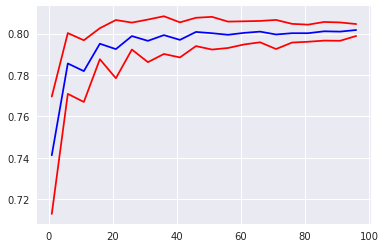

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df_scores['n_neighbours'],df_scores['limite_inferior'],color='r')
plt.plot(df_scores['n_neighbours'],df_scores['score_medio'],color='b')
plt.plot(df_scores['n_neighbours'],df_scores['limite_superior'],color='r');

In [104]:
# Matriz de features
from sklearn import preprocessing
X = df[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density','pH', 'sulphates', 'alcohol']]
X = preprocessing.scale(X, axis = 0)

# Vector de targets
y = df['high_quality']

In [105]:
y.count()

6497

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [107]:
# Elegimos el modelo óptimo que nos había indicado cross validation
model = KNeighborsClassifier(n_neighbors=98)
# Lo ajustamos sobre datos de entrenamiento
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=98, p=2,
           weights='uniform')

In [108]:
# Lo utilizamos para predecir en test
y_pred = model.predict(X_test)

In [109]:
y_pred.sum()

120.0

In [110]:
# Elaboramos la matriz de confusión:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1264,   30],
       [ 241,   90]])

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


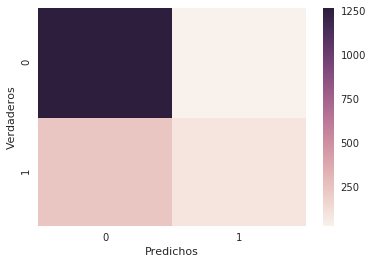

In [112]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred))

plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [111]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred, normalize=True)

0.83323076923076922